# MEE4006 CFD Lab
# Exercise 2

# This code solves the 1D heat conduction equation with fixed temperatures at both ends (Dritchlet type), with sources

## Governing equation
$\frac{\partial }{\partial x} \left ( k \frac{\partial T}{\partial x} \right ) + \dot{q}= 0 $

## Domain and material
$x \in [0,1]$

$k_{Aluminium} = 235.0 W/K $

$\dot{q} = 10^5 \frac{W}{m^3}$


## Boundary conditions
At $x=0, T_0 = 373 K$ 



At $x=1, T_1 = 303 K$

## Grid 

Find the optimal number of points needed to obtain grid converged solution.

## Numerical method

We implement the spacing marching method in space, using second-order central difference.

$ k \frac{\partial^2 T}{\partial x^2} = k \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2}$

Since, 

$ k \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2} = \dot{q} $

$T_i = \frac{T_{i+1}+T_{i-1}}{2} + \frac{\dot{q}\Delta x ^2}{2k}$


## Error

We find the L2-norm of the error i.e., the rate at which the solution changes

$ L_2 Norm = \sqrt{ \Sigma x_i^2 } $


# Exercise
## 1. Generate the line plot, and the contour plot, for T_left=150K, T_right = 500K
## 2. Report the convergence if we take 201 points, how many iterations does it take to converge to an error of 1e-2
## 3. Comment on the effect of grid size on the rate of convergence

In [2]:
import numpy as np # math library
import matplotlib.pyplot as plt # library for plotting
np.set_printoptions(precision=10) # sets the prcision for numbers - while printing

In [8]:
# Define parameters
N = 101
max_error = 1e-3 # the error at which the iteration should stop
max_iter = 12000

qdot=1e5
k = 235.0

T_left = 373.0
T_right = 303.0
T_guess = 300.0

In [3]:
# create grid from [0,N-1]
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(0.0, 1.0, N, endpoint=True, dtype=np.float64) 
dx = x[1]-x[0]
print('dx = ',dx)
x

dx =  0.01


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [4]:
# Create the data arrays
T = np.linspace(T_guess, T_guess, N, dtype=np.float64)
T_old = np.linspace(T_guess, T_guess, N, dtype=np.float64 )

In [5]:
T

array([300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300.])

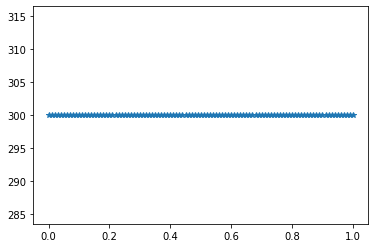

In [6]:
# plot initial condition
plt.plot(x,T,'*')

In [9]:
for i in range(0,max_iter):
    T_old = T.copy() # copy one array to another
    
    # set BCs
    T_old[0] = T_left
    T_old[N-1] = T_right

    # apply the difference formula
    for j in range(1,N-1): # note excludes N-1
        T[j] = ( T_old[j+1]+T_old[j-1] ) / 2.0 + (qdot*dx*dx)/(2.0*k)

    # set BCs        
    T[0] = T_left
    T[N-1]=T_right
    
    # compute error
    # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
    # https://numpy.org/doc/stable/reference/generated/numpy.subtract.html
    error=np.linalg.norm(np.subtract(T,T_old),2) 
    
    if(error >= max_error):
        print('Iteration = ',i,'Error = %10.8f' % error)
    else:
        print('Iteration = ',i,'Error = %10.8f' % error)
        print('Converged')
        break
    

Iteration =  0 Error = 36.55354754
Iteration =  1 Error = 18.28873009
Iteration =  2 Error = 12.94073508
Iteration =  3 Error = 10.23750760
Iteration =  4 Error = 8.57121859
Iteration =  5 Error = 7.42806975
Iteration =  6 Error = 6.58891806
Iteration =  7 Error = 5.94339117
Iteration =  8 Error = 5.42943538
Iteration =  9 Error = 5.00930351
Iteration =  10 Error = 4.65862849
Iteration =  11 Error = 4.36093162
Iteration =  12 Error = 4.10464363
Iteration =  13 Error = 3.88138770
Iteration =  14 Error = 3.68493978
Iteration =  15 Error = 3.51057261
Iteration =  16 Error = 3.35462713
Iteration =  17 Error = 3.21422410
Iteration =  18 Error = 3.08706486
Iteration =  19 Error = 2.97129062
Iteration =  20 Error = 2.86538095
Iteration =  21 Error = 2.76807946
Iteration =  22 Error = 2.67833820
Iteration =  23 Error = 2.59527577
Iteration =  24 Error = 2.51814515
Iteration =  25 Error = 2.44630873
Iteration =  26 Error = 2.37921882
Iteration =  27 Error = 2.31640213
Iteration =  28 Error = 2.

Iteration =  556 Error = 0.34233909
Iteration =  557 Error = 0.34202735
Iteration =  558 Error = 0.34171645
Iteration =  559 Error = 0.34140641
Iteration =  560 Error = 0.34109721
Iteration =  561 Error = 0.34078884
Iteration =  562 Error = 0.34048131
Iteration =  563 Error = 0.34017461
Iteration =  564 Error = 0.33986873
Iteration =  565 Error = 0.33956367
Iteration =  566 Error = 0.33925942
Iteration =  567 Error = 0.33895599
Iteration =  568 Error = 0.33865336
Iteration =  569 Error = 0.33835153
Iteration =  570 Error = 0.33805051
Iteration =  571 Error = 0.33775027
Iteration =  572 Error = 0.33745083
Iteration =  573 Error = 0.33715217
Iteration =  574 Error = 0.33685429
Iteration =  575 Error = 0.33655719
Iteration =  576 Error = 0.33626086
Iteration =  577 Error = 0.33596530
Iteration =  578 Error = 0.33567051
Iteration =  579 Error = 0.33537647
Iteration =  580 Error = 0.33508319
Iteration =  581 Error = 0.33479067
Iteration =  582 Error = 0.33449889
Iteration =  583 Error = 0.3

Iteration =  1146 Error = 0.23065393
Iteration =  1147 Error = 0.23052636
Iteration =  1148 Error = 0.23039889
Iteration =  1149 Error = 0.23027154
Iteration =  1150 Error = 0.23014430
Iteration =  1151 Error = 0.23001717
Iteration =  1152 Error = 0.22989015
Iteration =  1153 Error = 0.22976324
Iteration =  1154 Error = 0.22963644
Iteration =  1155 Error = 0.22950975
Iteration =  1156 Error = 0.22938317
Iteration =  1157 Error = 0.22925670
Iteration =  1158 Error = 0.22913034
Iteration =  1159 Error = 0.22900409
Iteration =  1160 Error = 0.22887795
Iteration =  1161 Error = 0.22875191
Iteration =  1162 Error = 0.22862599
Iteration =  1163 Error = 0.22850017
Iteration =  1164 Error = 0.22837446
Iteration =  1165 Error = 0.22824885
Iteration =  1166 Error = 0.22812336
Iteration =  1167 Error = 0.22799797
Iteration =  1168 Error = 0.22787269
Iteration =  1169 Error = 0.22774751
Iteration =  1170 Error = 0.22762244
Iteration =  1171 Error = 0.22749748
Iteration =  1172 Error = 0.22737262
I

Iteration =  1787 Error = 0.16523350
Iteration =  1788 Error = 0.16515048
Iteration =  1789 Error = 0.16506750
Iteration =  1790 Error = 0.16498457
Iteration =  1791 Error = 0.16490169
Iteration =  1792 Error = 0.16481886
Iteration =  1793 Error = 0.16473607
Iteration =  1794 Error = 0.16465332
Iteration =  1795 Error = 0.16457062
Iteration =  1796 Error = 0.16448797
Iteration =  1797 Error = 0.16440536
Iteration =  1798 Error = 0.16432280
Iteration =  1799 Error = 0.16424029
Iteration =  1800 Error = 0.16415782
Iteration =  1801 Error = 0.16407539
Iteration =  1802 Error = 0.16399302
Iteration =  1803 Error = 0.16391068
Iteration =  1804 Error = 0.16382840
Iteration =  1805 Error = 0.16374615
Iteration =  1806 Error = 0.16366396
Iteration =  1807 Error = 0.16358181
Iteration =  1808 Error = 0.16349970
Iteration =  1809 Error = 0.16341764
Iteration =  1810 Error = 0.16333562
Iteration =  1811 Error = 0.16325365
Iteration =  1812 Error = 0.16317173
Iteration =  1813 Error = 0.16308985
I

Iteration =  2344 Error = 0.12520870
Iteration =  2345 Error = 0.12514670
Iteration =  2346 Error = 0.12508473
Iteration =  2347 Error = 0.12502280
Iteration =  2348 Error = 0.12496089
Iteration =  2349 Error = 0.12489902
Iteration =  2350 Error = 0.12483717
Iteration =  2351 Error = 0.12477536
Iteration =  2352 Error = 0.12471358
Iteration =  2353 Error = 0.12465183
Iteration =  2354 Error = 0.12459011
Iteration =  2355 Error = 0.12452842
Iteration =  2356 Error = 0.12446677
Iteration =  2357 Error = 0.12440514
Iteration =  2358 Error = 0.12434355
Iteration =  2359 Error = 0.12428198
Iteration =  2360 Error = 0.12422045
Iteration =  2361 Error = 0.12415895
Iteration =  2362 Error = 0.12409748
Iteration =  2363 Error = 0.12403604
Iteration =  2364 Error = 0.12397464
Iteration =  2365 Error = 0.12391326
Iteration =  2366 Error = 0.12385191
Iteration =  2367 Error = 0.12379060
Iteration =  2368 Error = 0.12372931
Iteration =  2369 Error = 0.12366806
Iteration =  2370 Error = 0.12360684
I

Iteration =  2801 Error = 0.09988197
Iteration =  2802 Error = 0.09983264
Iteration =  2803 Error = 0.09978333
Iteration =  2804 Error = 0.09973405
Iteration =  2805 Error = 0.09968479
Iteration =  2806 Error = 0.09963556
Iteration =  2807 Error = 0.09958635
Iteration =  2808 Error = 0.09953717
Iteration =  2809 Error = 0.09948801
Iteration =  2810 Error = 0.09943888
Iteration =  2811 Error = 0.09938976
Iteration =  2812 Error = 0.09934068
Iteration =  2813 Error = 0.09929162
Iteration =  2814 Error = 0.09924258
Iteration =  2815 Error = 0.09919357
Iteration =  2816 Error = 0.09914458
Iteration =  2817 Error = 0.09909561
Iteration =  2818 Error = 0.09904667
Iteration =  2819 Error = 0.09899776
Iteration =  2820 Error = 0.09894887
Iteration =  2821 Error = 0.09890000
Iteration =  2822 Error = 0.09885116
Iteration =  2823 Error = 0.09880234
Iteration =  2824 Error = 0.09875354
Iteration =  2825 Error = 0.09870477
Iteration =  2826 Error = 0.09865603
Iteration =  2827 Error = 0.09860730
I

Iteration =  3272 Error = 0.07915498
Iteration =  3273 Error = 0.07911592
Iteration =  3274 Error = 0.07907687
Iteration =  3275 Error = 0.07903784
Iteration =  3276 Error = 0.07899883
Iteration =  3277 Error = 0.07895984
Iteration =  3278 Error = 0.07892087
Iteration =  3279 Error = 0.07888192
Iteration =  3280 Error = 0.07884299
Iteration =  3281 Error = 0.07880408
Iteration =  3282 Error = 0.07876518
Iteration =  3283 Error = 0.07872631
Iteration =  3284 Error = 0.07868745
Iteration =  3285 Error = 0.07864862
Iteration =  3286 Error = 0.07860980
Iteration =  3287 Error = 0.07857100
Iteration =  3288 Error = 0.07853222
Iteration =  3289 Error = 0.07849346
Iteration =  3290 Error = 0.07845472
Iteration =  3291 Error = 0.07841600
Iteration =  3292 Error = 0.07837730
Iteration =  3293 Error = 0.07833862
Iteration =  3294 Error = 0.07829996
Iteration =  3295 Error = 0.07826131
Iteration =  3296 Error = 0.07822269
Iteration =  3297 Error = 0.07818408
Iteration =  3298 Error = 0.07814549
I

Iteration =  3917 Error = 0.05757156
Iteration =  3918 Error = 0.05754315
Iteration =  3919 Error = 0.05751475
Iteration =  3920 Error = 0.05748637
Iteration =  3921 Error = 0.05745801
Iteration =  3922 Error = 0.05742965
Iteration =  3923 Error = 0.05740131
Iteration =  3924 Error = 0.05737299
Iteration =  3925 Error = 0.05734468
Iteration =  3926 Error = 0.05731638
Iteration =  3927 Error = 0.05728810
Iteration =  3928 Error = 0.05725983
Iteration =  3929 Error = 0.05723157
Iteration =  3930 Error = 0.05720333
Iteration =  3931 Error = 0.05717510
Iteration =  3932 Error = 0.05714689
Iteration =  3933 Error = 0.05711869
Iteration =  3934 Error = 0.05709051
Iteration =  3935 Error = 0.05706233
Iteration =  3936 Error = 0.05703418
Iteration =  3937 Error = 0.05700603
Iteration =  3938 Error = 0.05697790
Iteration =  3939 Error = 0.05694979
Iteration =  3940 Error = 0.05692169
Iteration =  3941 Error = 0.05689360
Iteration =  3942 Error = 0.05686552
Iteration =  3943 Error = 0.05683746
I

Iteration =  4518 Error = 0.04279382
Iteration =  4519 Error = 0.04277270
Iteration =  4520 Error = 0.04275159
Iteration =  4521 Error = 0.04273050
Iteration =  4522 Error = 0.04270941
Iteration =  4523 Error = 0.04268834
Iteration =  4524 Error = 0.04266728
Iteration =  4525 Error = 0.04264622
Iteration =  4526 Error = 0.04262518
Iteration =  4527 Error = 0.04260415
Iteration =  4528 Error = 0.04258312
Iteration =  4529 Error = 0.04256211
Iteration =  4530 Error = 0.04254111
Iteration =  4531 Error = 0.04252012
Iteration =  4532 Error = 0.04249914
Iteration =  4533 Error = 0.04247816
Iteration =  4534 Error = 0.04245720
Iteration =  4535 Error = 0.04243625
Iteration =  4536 Error = 0.04241531
Iteration =  4537 Error = 0.04239438
Iteration =  4538 Error = 0.04237347
Iteration =  4539 Error = 0.04235256
Iteration =  4540 Error = 0.04233166
Iteration =  4541 Error = 0.04231077
Iteration =  4542 Error = 0.04228989
Iteration =  4543 Error = 0.04226902
Iteration =  4544 Error = 0.04224817
I

Iteration =  5017 Error = 0.03345181
Iteration =  5018 Error = 0.03343530
Iteration =  5019 Error = 0.03341880
Iteration =  5020 Error = 0.03340231
Iteration =  5021 Error = 0.03338583
Iteration =  5022 Error = 0.03336935
Iteration =  5023 Error = 0.03335289
Iteration =  5024 Error = 0.03333643
Iteration =  5025 Error = 0.03331998
Iteration =  5026 Error = 0.03330354
Iteration =  5027 Error = 0.03328711
Iteration =  5028 Error = 0.03327068
Iteration =  5029 Error = 0.03325426
Iteration =  5030 Error = 0.03323786
Iteration =  5031 Error = 0.03322145
Iteration =  5032 Error = 0.03320506
Iteration =  5033 Error = 0.03318868
Iteration =  5034 Error = 0.03317230
Iteration =  5035 Error = 0.03315593
Iteration =  5036 Error = 0.03313957
Iteration =  5037 Error = 0.03312322
Iteration =  5038 Error = 0.03310687
Iteration =  5039 Error = 0.03309054
Iteration =  5040 Error = 0.03307421
Iteration =  5041 Error = 0.03305789
Iteration =  5042 Error = 0.03304158
Iteration =  5043 Error = 0.03302527
I

Iteration =  5514 Error = 0.02617502
Iteration =  5515 Error = 0.02616211
Iteration =  5516 Error = 0.02614920
Iteration =  5517 Error = 0.02613629
Iteration =  5518 Error = 0.02612340
Iteration =  5519 Error = 0.02611051
Iteration =  5520 Error = 0.02609762
Iteration =  5521 Error = 0.02608474
Iteration =  5522 Error = 0.02607187
Iteration =  5523 Error = 0.02605901
Iteration =  5524 Error = 0.02604615
Iteration =  5525 Error = 0.02603330
Iteration =  5526 Error = 0.02602045
Iteration =  5527 Error = 0.02600761
Iteration =  5528 Error = 0.02599478
Iteration =  5529 Error = 0.02598195
Iteration =  5530 Error = 0.02596913
Iteration =  5531 Error = 0.02595632
Iteration =  5532 Error = 0.02594351
Iteration =  5533 Error = 0.02593071
Iteration =  5534 Error = 0.02591791
Iteration =  5535 Error = 0.02590512
Iteration =  5536 Error = 0.02589234
Iteration =  5537 Error = 0.02587956
Iteration =  5538 Error = 0.02586679
Iteration =  5539 Error = 0.02585403
Iteration =  5540 Error = 0.02584127
I

Iteration =  5975 Error = 0.02084833
Iteration =  5976 Error = 0.02083804
Iteration =  5977 Error = 0.02082776
Iteration =  5978 Error = 0.02081748
Iteration =  5979 Error = 0.02080721
Iteration =  5980 Error = 0.02079694
Iteration =  5981 Error = 0.02078668
Iteration =  5982 Error = 0.02077642
Iteration =  5983 Error = 0.02076617
Iteration =  5984 Error = 0.02075592
Iteration =  5985 Error = 0.02074568
Iteration =  5986 Error = 0.02073544
Iteration =  5987 Error = 0.02072521
Iteration =  5988 Error = 0.02071499
Iteration =  5989 Error = 0.02070476
Iteration =  5990 Error = 0.02069455
Iteration =  5991 Error = 0.02068434
Iteration =  5992 Error = 0.02067413
Iteration =  5993 Error = 0.02066393
Iteration =  5994 Error = 0.02065373
Iteration =  5995 Error = 0.02064354
Iteration =  5996 Error = 0.02063335
Iteration =  5997 Error = 0.02062317
Iteration =  5998 Error = 0.02061300
Iteration =  5999 Error = 0.02060283
Iteration =  6000 Error = 0.02059266
Iteration =  6001 Error = 0.02058250
I

Iteration =  6439 Error = 0.01658106
Iteration =  6440 Error = 0.01657288
Iteration =  6441 Error = 0.01656470
Iteration =  6442 Error = 0.01655653
Iteration =  6443 Error = 0.01654836
Iteration =  6444 Error = 0.01654019
Iteration =  6445 Error = 0.01653203
Iteration =  6446 Error = 0.01652387
Iteration =  6447 Error = 0.01651572
Iteration =  6448 Error = 0.01650757
Iteration =  6449 Error = 0.01649943
Iteration =  6450 Error = 0.01649128
Iteration =  6451 Error = 0.01648315
Iteration =  6452 Error = 0.01647501
Iteration =  6453 Error = 0.01646688
Iteration =  6454 Error = 0.01645876
Iteration =  6455 Error = 0.01645064
Iteration =  6456 Error = 0.01644252
Iteration =  6457 Error = 0.01643441
Iteration =  6458 Error = 0.01642630
Iteration =  6459 Error = 0.01641819
Iteration =  6460 Error = 0.01641009
Iteration =  6461 Error = 0.01640199
Iteration =  6462 Error = 0.01639390
Iteration =  6463 Error = 0.01638581
Iteration =  6464 Error = 0.01637773
Iteration =  6465 Error = 0.01636964
I

Iteration =  6893 Error = 0.01325248
Iteration =  6894 Error = 0.01324594
Iteration =  6895 Error = 0.01323940
Iteration =  6896 Error = 0.01323287
Iteration =  6897 Error = 0.01322634
Iteration =  6898 Error = 0.01321981
Iteration =  6899 Error = 0.01321329
Iteration =  6900 Error = 0.01320677
Iteration =  6901 Error = 0.01320025
Iteration =  6902 Error = 0.01319374
Iteration =  6903 Error = 0.01318723
Iteration =  6904 Error = 0.01318072
Iteration =  6905 Error = 0.01317422
Iteration =  6906 Error = 0.01316772
Iteration =  6907 Error = 0.01316122
Iteration =  6908 Error = 0.01315472
Iteration =  6909 Error = 0.01314823
Iteration =  6910 Error = 0.01314174
Iteration =  6911 Error = 0.01313526
Iteration =  6912 Error = 0.01312878
Iteration =  6913 Error = 0.01312230
Iteration =  6914 Error = 0.01311583
Iteration =  6915 Error = 0.01310935
Iteration =  6916 Error = 0.01310288
Iteration =  6917 Error = 0.01309642
Iteration =  6918 Error = 0.01308996
Iteration =  6919 Error = 0.01308350
I

Iteration =  7346 Error = 0.01059732
Iteration =  7347 Error = 0.01059209
Iteration =  7348 Error = 0.01058686
Iteration =  7349 Error = 0.01058164
Iteration =  7350 Error = 0.01057642
Iteration =  7351 Error = 0.01057120
Iteration =  7352 Error = 0.01056598
Iteration =  7353 Error = 0.01056077
Iteration =  7354 Error = 0.01055556
Iteration =  7355 Error = 0.01055035
Iteration =  7356 Error = 0.01054514
Iteration =  7357 Error = 0.01053994
Iteration =  7358 Error = 0.01053474
Iteration =  7359 Error = 0.01052954
Iteration =  7360 Error = 0.01052435
Iteration =  7361 Error = 0.01051915
Iteration =  7362 Error = 0.01051396
Iteration =  7363 Error = 0.01050877
Iteration =  7364 Error = 0.01050359
Iteration =  7365 Error = 0.01049841
Iteration =  7366 Error = 0.01049322
Iteration =  7367 Error = 0.01048805
Iteration =  7368 Error = 0.01048287
Iteration =  7369 Error = 0.01047770
Iteration =  7370 Error = 0.01047253
Iteration =  7371 Error = 0.01046736
Iteration =  7372 Error = 0.01046220
I

Iteration =  7809 Error = 0.00843241
Iteration =  7810 Error = 0.00842824
Iteration =  7811 Error = 0.00842409
Iteration =  7812 Error = 0.00841993
Iteration =  7813 Error = 0.00841577
Iteration =  7814 Error = 0.00841162
Iteration =  7815 Error = 0.00840747
Iteration =  7816 Error = 0.00840332
Iteration =  7817 Error = 0.00839918
Iteration =  7818 Error = 0.00839503
Iteration =  7819 Error = 0.00839089
Iteration =  7820 Error = 0.00838675
Iteration =  7821 Error = 0.00838261
Iteration =  7822 Error = 0.00837847
Iteration =  7823 Error = 0.00837434
Iteration =  7824 Error = 0.00837021
Iteration =  7825 Error = 0.00836608
Iteration =  7826 Error = 0.00836195
Iteration =  7827 Error = 0.00835782
Iteration =  7828 Error = 0.00835370
Iteration =  7829 Error = 0.00834958
Iteration =  7830 Error = 0.00834546
Iteration =  7831 Error = 0.00834134
Iteration =  7832 Error = 0.00833722
Iteration =  7833 Error = 0.00833311
Iteration =  7834 Error = 0.00832900
Iteration =  7835 Error = 0.00832489
I

Iteration =  8220 Error = 0.00688420
Iteration =  8221 Error = 0.00688080
Iteration =  8222 Error = 0.00687740
Iteration =  8223 Error = 0.00687401
Iteration =  8224 Error = 0.00687062
Iteration =  8225 Error = 0.00686723
Iteration =  8226 Error = 0.00686384
Iteration =  8227 Error = 0.00686045
Iteration =  8228 Error = 0.00685707
Iteration =  8229 Error = 0.00685368
Iteration =  8230 Error = 0.00685030
Iteration =  8231 Error = 0.00684692
Iteration =  8232 Error = 0.00684354
Iteration =  8233 Error = 0.00684017
Iteration =  8234 Error = 0.00683679
Iteration =  8235 Error = 0.00683342
Iteration =  8236 Error = 0.00683005
Iteration =  8237 Error = 0.00682668
Iteration =  8238 Error = 0.00682331
Iteration =  8239 Error = 0.00681994
Iteration =  8240 Error = 0.00681657
Iteration =  8241 Error = 0.00681321
Iteration =  8242 Error = 0.00680985
Iteration =  8243 Error = 0.00680649
Iteration =  8244 Error = 0.00680313
Iteration =  8245 Error = 0.00679977
Iteration =  8246 Error = 0.00679642
I

Iteration =  8680 Error = 0.00548595
Iteration =  8681 Error = 0.00548324
Iteration =  8682 Error = 0.00548054
Iteration =  8683 Error = 0.00547783
Iteration =  8684 Error = 0.00547513
Iteration =  8685 Error = 0.00547243
Iteration =  8686 Error = 0.00546973
Iteration =  8687 Error = 0.00546703
Iteration =  8688 Error = 0.00546433
Iteration =  8689 Error = 0.00546163
Iteration =  8690 Error = 0.00545894
Iteration =  8691 Error = 0.00545625
Iteration =  8692 Error = 0.00545355
Iteration =  8693 Error = 0.00545086
Iteration =  8694 Error = 0.00544817
Iteration =  8695 Error = 0.00544548
Iteration =  8696 Error = 0.00544280
Iteration =  8697 Error = 0.00544011
Iteration =  8698 Error = 0.00543743
Iteration =  8699 Error = 0.00543474
Iteration =  8700 Error = 0.00543206
Iteration =  8701 Error = 0.00542938
Iteration =  8702 Error = 0.00542670
Iteration =  8703 Error = 0.00542403
Iteration =  8704 Error = 0.00542135
Iteration =  8705 Error = 0.00541867
Iteration =  8706 Error = 0.00541600
I

Iteration =  9125 Error = 0.00440419
Iteration =  9126 Error = 0.00440201
Iteration =  9127 Error = 0.00439984
Iteration =  9128 Error = 0.00439767
Iteration =  9129 Error = 0.00439550
Iteration =  9130 Error = 0.00439333
Iteration =  9131 Error = 0.00439116
Iteration =  9132 Error = 0.00438900
Iteration =  9133 Error = 0.00438683
Iteration =  9134 Error = 0.00438466
Iteration =  9135 Error = 0.00438250
Iteration =  9136 Error = 0.00438034
Iteration =  9137 Error = 0.00437818
Iteration =  9138 Error = 0.00437602
Iteration =  9139 Error = 0.00437386
Iteration =  9140 Error = 0.00437170
Iteration =  9141 Error = 0.00436954
Iteration =  9142 Error = 0.00436739
Iteration =  9143 Error = 0.00436523
Iteration =  9144 Error = 0.00436308
Iteration =  9145 Error = 0.00436092
Iteration =  9146 Error = 0.00435877
Iteration =  9147 Error = 0.00435662
Iteration =  9148 Error = 0.00435447
Iteration =  9149 Error = 0.00435232
Iteration =  9150 Error = 0.00435018
Iteration =  9151 Error = 0.00434803
I

Iteration =  9547 Error = 0.00357610
Iteration =  9548 Error = 0.00357433
Iteration =  9549 Error = 0.00357257
Iteration =  9550 Error = 0.00357081
Iteration =  9551 Error = 0.00356905
Iteration =  9552 Error = 0.00356728
Iteration =  9553 Error = 0.00356552
Iteration =  9554 Error = 0.00356376
Iteration =  9555 Error = 0.00356201
Iteration =  9556 Error = 0.00356025
Iteration =  9557 Error = 0.00355849
Iteration =  9558 Error = 0.00355674
Iteration =  9559 Error = 0.00355498
Iteration =  9560 Error = 0.00355323
Iteration =  9561 Error = 0.00355147
Iteration =  9562 Error = 0.00354972
Iteration =  9563 Error = 0.00354797
Iteration =  9564 Error = 0.00354622
Iteration =  9565 Error = 0.00354447
Iteration =  9566 Error = 0.00354272
Iteration =  9567 Error = 0.00354097
Iteration =  9568 Error = 0.00353922
Iteration =  9569 Error = 0.00353748
Iteration =  9570 Error = 0.00353573
Iteration =  9571 Error = 0.00353399
Iteration =  9572 Error = 0.00353224
Iteration =  9573 Error = 0.00353050
I

Iteration =  10041 Error = 0.00280233
Iteration =  10042 Error = 0.00280095
Iteration =  10043 Error = 0.00279957
Iteration =  10044 Error = 0.00279819
Iteration =  10045 Error = 0.00279681
Iteration =  10046 Error = 0.00279543
Iteration =  10047 Error = 0.00279405
Iteration =  10048 Error = 0.00279267
Iteration =  10049 Error = 0.00279129
Iteration =  10050 Error = 0.00278991
Iteration =  10051 Error = 0.00278854
Iteration =  10052 Error = 0.00278716
Iteration =  10053 Error = 0.00278579
Iteration =  10054 Error = 0.00278441
Iteration =  10055 Error = 0.00278304
Iteration =  10056 Error = 0.00278166
Iteration =  10057 Error = 0.00278029
Iteration =  10058 Error = 0.00277892
Iteration =  10059 Error = 0.00277755
Iteration =  10060 Error = 0.00277618
Iteration =  10061 Error = 0.00277481
Iteration =  10062 Error = 0.00277344
Iteration =  10063 Error = 0.00277207
Iteration =  10064 Error = 0.00277070
Iteration =  10065 Error = 0.00276934
Iteration =  10066 Error = 0.00276797
Iteration = 

Iteration =  10461 Error = 0.00227768
Iteration =  10462 Error = 0.00227656
Iteration =  10463 Error = 0.00227543
Iteration =  10464 Error = 0.00227431
Iteration =  10465 Error = 0.00227319
Iteration =  10466 Error = 0.00227207
Iteration =  10467 Error = 0.00227094
Iteration =  10468 Error = 0.00226982
Iteration =  10469 Error = 0.00226870
Iteration =  10470 Error = 0.00226758
Iteration =  10471 Error = 0.00226647
Iteration =  10472 Error = 0.00226535
Iteration =  10473 Error = 0.00226423
Iteration =  10474 Error = 0.00226311
Iteration =  10475 Error = 0.00226200
Iteration =  10476 Error = 0.00226088
Iteration =  10477 Error = 0.00225976
Iteration =  10478 Error = 0.00225865
Iteration =  10479 Error = 0.00225753
Iteration =  10480 Error = 0.00225642
Iteration =  10481 Error = 0.00225531
Iteration =  10482 Error = 0.00225419
Iteration =  10483 Error = 0.00225308
Iteration =  10484 Error = 0.00225197
Iteration =  10485 Error = 0.00225086
Iteration =  10486 Error = 0.00224975
Iteration = 

Iteration =  10998 Error = 0.00174738
Iteration =  10999 Error = 0.00174651
Iteration =  11000 Error = 0.00174565
Iteration =  11001 Error = 0.00174479
Iteration =  11002 Error = 0.00174393
Iteration =  11003 Error = 0.00174307
Iteration =  11004 Error = 0.00174221
Iteration =  11005 Error = 0.00174135
Iteration =  11006 Error = 0.00174049
Iteration =  11007 Error = 0.00173963
Iteration =  11008 Error = 0.00173877
Iteration =  11009 Error = 0.00173791
Iteration =  11010 Error = 0.00173706
Iteration =  11011 Error = 0.00173620
Iteration =  11012 Error = 0.00173534
Iteration =  11013 Error = 0.00173449
Iteration =  11014 Error = 0.00173363
Iteration =  11015 Error = 0.00173278
Iteration =  11016 Error = 0.00173192
Iteration =  11017 Error = 0.00173107
Iteration =  11018 Error = 0.00173021
Iteration =  11019 Error = 0.00172936
Iteration =  11020 Error = 0.00172850
Iteration =  11021 Error = 0.00172765
Iteration =  11022 Error = 0.00172680
Iteration =  11023 Error = 0.00172595
Iteration = 

Iteration =  11489 Error = 0.00137132
Iteration =  11490 Error = 0.00137065
Iteration =  11491 Error = 0.00136997
Iteration =  11492 Error = 0.00136929
Iteration =  11493 Error = 0.00136862
Iteration =  11494 Error = 0.00136794
Iteration =  11495 Error = 0.00136727
Iteration =  11496 Error = 0.00136659
Iteration =  11497 Error = 0.00136592
Iteration =  11498 Error = 0.00136525
Iteration =  11499 Error = 0.00136457
Iteration =  11500 Error = 0.00136390
Iteration =  11501 Error = 0.00136323
Iteration =  11502 Error = 0.00136255
Iteration =  11503 Error = 0.00136188
Iteration =  11504 Error = 0.00136121
Iteration =  11505 Error = 0.00136054
Iteration =  11506 Error = 0.00135987
Iteration =  11507 Error = 0.00135919
Iteration =  11508 Error = 0.00135852
Iteration =  11509 Error = 0.00135785
Iteration =  11510 Error = 0.00135718
Iteration =  11511 Error = 0.00135651
Iteration =  11512 Error = 0.00135584
Iteration =  11513 Error = 0.00135517
Iteration =  11514 Error = 0.00135451
Iteration = 

Iteration =  11923 Error = 0.00110691
Iteration =  11924 Error = 0.00110636
Iteration =  11925 Error = 0.00110582
Iteration =  11926 Error = 0.00110527
Iteration =  11927 Error = 0.00110472
Iteration =  11928 Error = 0.00110418
Iteration =  11929 Error = 0.00110363
Iteration =  11930 Error = 0.00110309
Iteration =  11931 Error = 0.00110255
Iteration =  11932 Error = 0.00110200
Iteration =  11933 Error = 0.00110146
Iteration =  11934 Error = 0.00110091
Iteration =  11935 Error = 0.00110037
Iteration =  11936 Error = 0.00109983
Iteration =  11937 Error = 0.00109929
Iteration =  11938 Error = 0.00109874
Iteration =  11939 Error = 0.00109820
Iteration =  11940 Error = 0.00109766
Iteration =  11941 Error = 0.00109712
Iteration =  11942 Error = 0.00109658
Iteration =  11943 Error = 0.00109604
Iteration =  11944 Error = 0.00109549
Iteration =  11945 Error = 0.00109495
Iteration =  11946 Error = 0.00109441
Iteration =  11947 Error = 0.00109387
Iteration =  11948 Error = 0.00109333
Iteration = 

In [10]:
T

array([373.          , 374.3976951081, 375.7528496147, 377.0654600369,
       378.3355549879, 379.5631149256, 380.7481843735, 381.8907278076,
       382.9908054858, 384.0483660424, 385.0634852319, 386.0360960496,
       386.9662894478, 387.8539830472, 388.6992826388, 389.5020907938,
       390.2625277244, 390.980481337 , 391.6560857905, 392.2892147688,
       392.8800158482, 393.4283489883, 393.9343746005, 394.3979394731,
       394.8192162192, 395.1980390604, 395.5345921305, 395.8286977386,
       396.0805508125, 396.28996245  , 396.4571376035, 396.5818769053,
       396.6643945234, 396.7044814113, 396.7023601076, 396.6578127119,
       396.5710692552, 396.441903843 , 396.2705530909, 396.0567840019,
       395.8008388424, 395.5024784325, 395.1619497331, 394.7790083254,
       394.3539048901, 393.8863907342, 393.376719269 , 392.8246385084,
       392.2304035945, 391.5937602427, 390.9149643186, 390.1937602429,
       389.4304035948, 388.6246385088, 387.7767192695, 386.8863907349,
      

In [11]:
T_old

array([373.          , 374.3976928291, 375.7528370247, 377.0654532088,
       378.3355298576, 379.5631035754, 380.7481468021, 381.8907119801,
       382.9907556216, 384.0483458   , 385.0634232717, 386.0360714723,
       386.9662156361, 387.8539542319, 388.6991972669, 389.5020578542,
       390.2624311292, 390.9804444031, 391.6559783533, 392.2891739865,
       392.8798979929, 393.4283045184, 393.9342467923, 394.3978914911,
       394.8190789624, 395.1979877558, 395.5344459669, 395.8286433138,
       396.0803963189, 396.2899051197, 396.4569753896, 396.5818168958,
       396.6642252294, 396.7044189595, 396.7021844017, 396.6577480643,
       396.5708878307, 396.4418372546, 396.2703666638, 396.0567157356,
       395.8006481485, 395.5024087577, 395.161755525 , 394.778937517 ,
       394.3537079343, 393.8863190717, 393.3765203426, 392.8245662747,
       392.2302034827, 391.5936877228, 390.9147638112, 390.1936877229,
       389.430203483 , 388.6245662751, 387.7765203432, 386.8863190724,
      

In [12]:
# Lets computet he anlytical solution
T_analytical = (T_right-T_left)*x+T_left - qdot*x*(x-1)/(2.0*k)


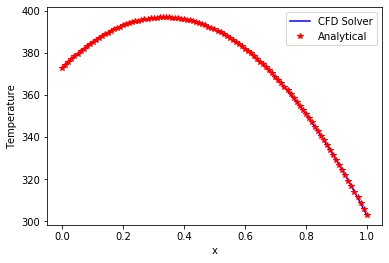

In [13]:
# plot final condition
# https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.xlabel('x')
plt.ylabel('Temperature')
plt.plot(x,T,'b-',label='CFD Solver')
plt.plot(x, T_analytical,'r*',label='Analytical')
plt.legend() 
plt.show()


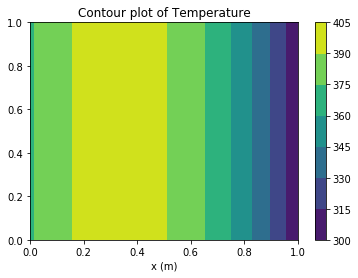

In [14]:
# contour plot
#############################
X, Y = np.meshgrid(x,x ) # create a dummy 2D grid 
# https://numpy.org/doc/stable/reference/generated/numpy.tile.html
# copy the 1D data to a 2D array
T2D = np.tile(T,(N,1))

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T2D)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour plot of Temperature')
ax.set_xlabel('x (m)')
plt.show()